In [1]:
import pandas as pd
import aal as aal
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def _rotate(geolet, theta):

    newList = [(x * math.cos(theta) + y * -math.sin(theta), (x * math.sin(theta) + y * math.cos(theta))) for x, y in
            zip(geolet[0], geolet[1])]


    return [[x[0] for x in newList], [x[1] for x in newList]]

In [3]:
def transform_geolet(geolet):
    return [(a, b) for a,b in zip(geolet[0], geolet[1])], geolet[2]

def reverse_transform_geolet(geolet_t, time_dim):
    return [[x[0] for x in geolet_t], [x[1] for x in geolet_t], time_dim]

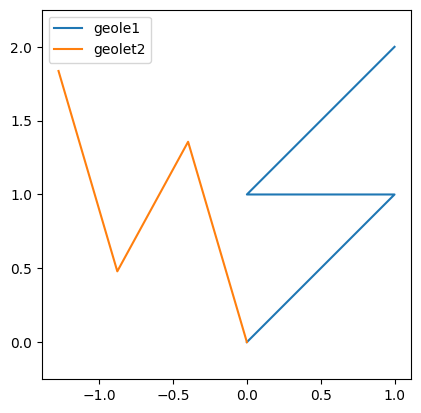

In [4]:
geolet1 = [
    [0, 1, 0, 1],  # lat
    [0, 1, 1, 2],  # lon
    [0, 1, 2],  # time
]

geolet2 = _rotate(geolet1, math.pi/2-.5)
geolet2.append(geolet1[-1])

plt.plot(geolet1[0], geolet1[1], label="geole1")
plt.plot(geolet2[0], geolet2[1], label="geolet2")

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.set_box_aspect(1)

plt.legend()

In [5]:
geolet1_transf, geolet1_time = transform_geolet(geolet1)
geolet2_transf, geolet2_time = transform_geolet(geolet2)

In [6]:
geolet1_rot_inv = aal.to_aal([geolet1_transf], scale_invariant=False, rotation_invariant=True)[0]
geolet2_rot_inv = aal.to_aal([geolet2_transf], scale_invariant=False, rotation_invariant=True)[0]

Frechet_dits=2.09440	dtw=4.18879


Text(0, 0.5, 'norm')

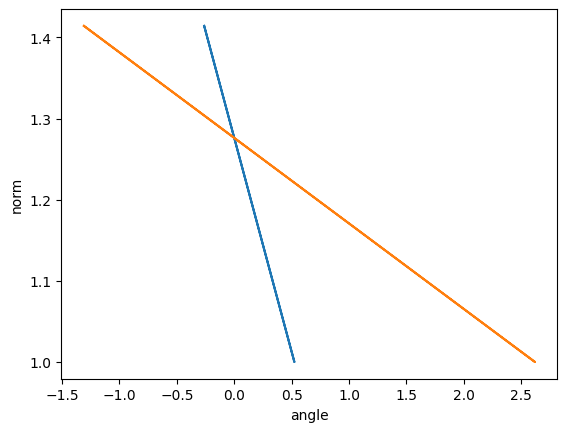

In [7]:
from similaritymeasures import dtw, frechet_dist

geolet1_rot_inv = aal.to_aal([geolet1_transf], scale_invariant=False, rotation_invariant=True)[0]
geolet2_rot_inv = aal.to_aal([geolet2_transf], scale_invariant=False, rotation_invariant=True)[0]

fd_aal = frechet_dist(geolet1_rot_inv, geolet2_rot_inv)
dtw_aal, d_aal = dtw(geolet1_rot_inv, geolet2_rot_inv, metric=aal.d_warp)

print(f"Frechet_dits={fd_aal:.5f}\tdtw={dtw_aal:.5f}")

geolet1_rot_inv_plot = reverse_transform_geolet(geolet1_rot_inv, geolet1_time)
geolet2_rot_inv_plot = reverse_transform_geolet(geolet2_rot_inv, geolet2_time)

plt.plot(geolet1_rot_inv_plot[0], geolet1_rot_inv_plot[1])
plt.plot(geolet2_rot_inv_plot[0], geolet2_rot_inv_plot[1])

plt.xlabel("angle")
plt.ylabel("norm")

In [8]:
geolet1_rot_inv

[(-0.26179938779914946, 1.4142135623730951),
 (0.5235987755982989, 1.0),
 (-0.26179938779914946, 1.4142135623730951)]

In [9]:
geolet2_rot_inv

[(-1.308996938995747, 1.4142135623730951),
 (2.6179938779914944, 1.0),
 (-1.308996938995747, 1.4142135623730951)]

Frechet_dits=2.07080	dtw=4.21239


Text(0, 0.5, 'norm')

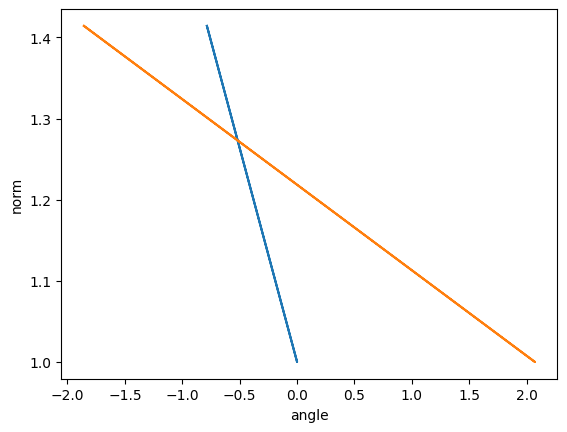

In [10]:
from similaritymeasures import dtw, frechet_dist

geolet1_rot_inv = aal.to_aal([geolet1_transf], scale_invariant=False, rotation_invariant=False)[0]
geolet2_rot_inv = aal.to_aal([geolet2_transf], scale_invariant=False, rotation_invariant=False)[0]

fd_aal = frechet_dist(geolet1_rot_inv, geolet2_rot_inv)
dtw_aal, d_aal = dtw(geolet1_rot_inv, geolet2_rot_inv, metric=aal.d_warp)

print(f"Frechet_dits={fd_aal:.5f}\tdtw={dtw_aal:.5f}")

geolet1_rot_inv_plot = reverse_transform_geolet(geolet1_rot_inv, geolet1_time)
geolet2_rot_inv_plot = reverse_transform_geolet(geolet2_rot_inv, geolet2_time)

plt.plot(geolet1_rot_inv_plot[0], geolet1_rot_inv_plot[1])
plt.plot(geolet2_rot_inv_plot[0], geolet2_rot_inv_plot[1])

plt.xlabel("angle")
plt.ylabel("norm")

In [11]:
geolet2_rot_inv

[(-1.8561944901923448, 1.4142135623730951),
 (2.0707963267948966, 1.0),
 (-1.8561944901923448, 1.4142135623730951)]

In [12]:
geolet1_rot_inv

[(-0.7853981633974484, 1.4142135623730951),
 (0.0, 1.0),
 (-0.7853981633974484, 1.4142135623730951)]

In [13]:
[((x+math.pi/2)%math.pi, y) for x, y in geolet1_rot_inv]

[(0.7853981633974482, 1.4142135623730951),
 (1.5707963267948966, 1.0),
 (0.7853981633974482, 1.4142135623730951)]

In [14]:
[((x+math.pi)%math.pi, y) for x, y in geolet2_rot_inv]

[(1.2853981633974483, 1.4142135623730951),
 (2.0707963267948966, 1.0),
 (1.2853981633974483, 1.4142135623730951)]